In [1]:
import os
import math
import dill
from itertools import permutations

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from matplotlib import gridspec
import pandas as pd
from pingouin import mixed_anova, anova, pairwise_tukey, pairwise_ttests
from statsmodels.regression.mixed_linear_model import MixedLM

import suite2p as s2p

import TwoPUtils as tpu
import STX3KO_analyses as stx
from STX3KO_analyses import utilities as u

ko_mice = stx.ymaze_sess_deets.ko_mice
ctrl_mice = stx.ymaze_sess_deets.ctrl_mice


%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
df_licks = pd.read_pickle("df_lickrate.pkl")
df_frac = pd.read_pickle("df_rewardfrac.pkl")

0
-0.41666666666666663 0.26458604674749614
0.6071428571428572 0.1482311614811614
1
-0.049999999999999996 0.8983528043506301
0.07142857142857144 0.8790481931481541
2
-0.35 0.35581957250178897
0.21428571428571433 0.6445115810207203
3
-0.6 0.0876228290414024
0.5 0.25316999510032273
4
-0.18333333333333335 0.6368198117628943
0.07142857142857144 0.8790481931481541
5
-0.21666666666666667 0.5755148957119259
0.3214285714285715 0.4820720382996776


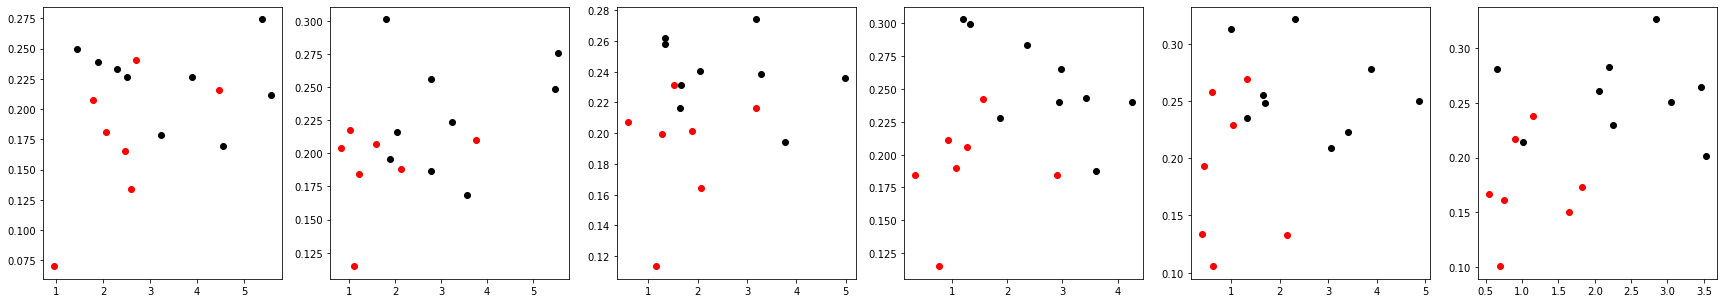

In [56]:
fig,ax = plt.subplots(1,6,figsize=[30,5])
for day in range(6):
    print(day)
    lick_mask = (df_licks['day']==day) & (df_licks['nov']==0)
    
    frac_mask  =(df_frac['day']==day) & (df_frac['novfam']==0)
    licks = np.array([df_licks['lickrate'].loc[lick_mask & (df_licks['mouse']==mouse)]._values for mouse in ctrl_mice]).ravel()
    fracs = np.array([df_frac['frac'].loc[frac_mask & (df_frac['mouse']==mouse)]._values for mouse in ctrl_mice]).ravel()
    ax[day].scatter(licks,fracs, color='black')
    r,p = sp.stats.spearmanr(licks,fracs)
    print(r,p)
    
    licks = np.array([df_licks['lickrate'].loc[lick_mask & (df_licks['mouse']==mouse)]._values for mouse in ko_mice]).ravel()
    fracs = np.array([df_frac['frac'].loc[frac_mask & (df_frac['mouse']==mouse)]._values for mouse in ko_mice]).ravel()
    ax[day].scatter(licks,fracs, color='red')
    r,p = sp.stats.spearmanr(licks,fracs)
    print(r,p)

0.16684223320638522 0.29094330893762776


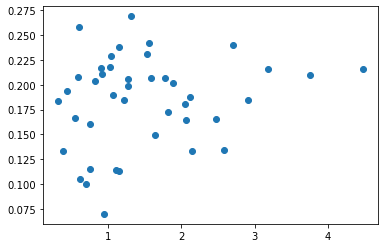

In [54]:
# lick_mask =  (df_licks['lr']==1)
fig,ax = plt.subplots(1,2, figsize=[10,5])
for nov in (0,1)
    lick_mask = (df_licks['nov']==nov)

    # frac_mask  =(df_licks['lr']==1) 
    frac_mask = (df_frac['novfam']==nov)

    licks = np.array([df_licks['lickrate'].loc[lick_mask & (df_licks['mouse']==mouse)]._values for mouse in ko_mice]).ravel()
    fracs = np.array([df_frac['frac'].loc[frac_mask & (df_frac['mouse']==mouse)]._values for mouse in ko_mice]).ravel()
    r,p = sp.stats.spearmanr(licks,fracs)
    print(r,p)

    
    ax.scatter(licks,fracs)

In [ ]:
fig,ax = plt.subplots()
for i,mouse in ctrl_mice:
    lick_mask =  (df_licks['nov']==0)
    
frac_mask  =(df_frac['novfam']==0)